# Peak detection

### Importing of libraries and index of Dataframe constant declaration

### Roadmap

#### 1. Importing data:
    1. Importing of dummy data, converting into set of values for a single BLM
    2. Using MQTT to obtain new set of data for all BLMs at later stage
#### 2. Finding peaks:
    1. 4 Methods:
        1. Scipy's find_peaks function (takes in width, height threshold parameters etc.)
        2. Scipy's prominence function (parameters?)
        3. Peakutils
        4. Regression / Base line with threshold height, and length (samples or time)
            1. Length thresholding ((n from left, n from right) >= threshold or modified threshold)
            2. Definite Integration ((limits are n from left to n from left, threshold area))
        Testing (time complexity)
#### 3. Returns / Displaying to user
    1. Iterate through all BLMs -- plot each graph with peak(s) illustrated with regard to user-defined parameters / thresholds
    2. With regards to GUIs -- sliders for parameters / thresholds, switching between BLM or display all BLMs at once
    3. Options to use different methods (on/off for area threshold use)
    
    
parameters:
- thresheight (minimum displacement from baseline to be considered a peak), windowlength, polyorder, distlength, 

In [641]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from scipy import stats
import statsmodels.api as sm

DFI = 5

In [598]:
files = glob.glob("BLM_R5IM_Data/cycle" + '/*.csv')

In [470]:
for file in files:
    print(file) 

BLM_R5IM_Data/cycle\26_05_2023_00_35_36_034042.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_36_926089.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_38_236517.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_39_115167.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_39_949234.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_41_013048.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_42_031331.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_43_025596.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_44_019355.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_45_049643.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_45_987319.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_48_010611.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_48_369257.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_49_086323.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_50_079591.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_51_063682.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_52_020982.csv
BLM_R5IM_Data/cycle\26_05_2023_00_35_53_032674.csv


In [471]:
selected_file = files[0]

In [472]:
input_data = pd.read_csv(selected_file)
dataframe = input_data.drop(columns = input_data.columns[0]).to_numpy()

In [714]:
dataframe

print(type(dataframe))

<class 'numpy.ndarray'>


In [474]:
x_data = np.linspace(-0.5, 10.5, 2200)
print(x_data)

[-0.5        -0.49499773 -0.48999545 ... 10.48999545 10.49499773
 10.5       ]


### Plot dataframe

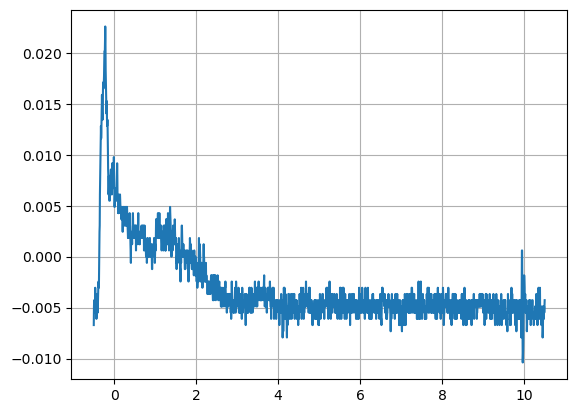

In [735]:
plt.plot(x_data, dataframe[1]);
plt.grid()

### Peak finding method 1 -- Scipy function find_peaks

In [476]:
peaks = find_peaks(dataframe[DFI])
print(peaks)

(array([   1,    7,   10,   13,   19,   21,   24,   26,   30,   35,   38,
         40,   43,   46,   49,   51,   54,   56,   59,   64,   70,   75,
         79,   81,   90,   92,   95,   97,  100,  103,  106,  108,  114,
        121,  124,  127,  129,  134,  137,  140,  143,  147,  152,  156,
        164,  166,  169,  172,  175,  177,  180,  183,  186,  190,  193,
        195,  198,  201,  205,  211,  214,  217,  219,  222,  227,  232,
        236,  240,  245,  254,  257,  260,  264,  266,  269,  275,  279,
        286,  289,  292,  295,  299,  306,  309,  312,  314,  318,  324,
        327,  330,  332,  337,  343,  346,  349,  353,  355,  357,  362,
        366,  369,  371,  375,  378,  380,  382,  387,  389,  392,  401,
        403,  407,  411,  415,  418,  421,  423,  426,  429,  432,  435,
        438,  441,  443,  446,  449,  452,  455,  458,  466,  468,  470,
        472,  475,  480,  482,  484,  495,  497,  500,  504,  506,  511,
        517,  519,  526,  532,  534,  539,  541,  

### Base line creation method 1 - Least squares regression line

[-0.00507401 -0.00507539 -0.00507676 ... -0.00808447 -0.00808584
 -0.00808721]
[-0.00732 -0.00671 -0.00671 ... -0.00488 -0.00793 -0.00671]


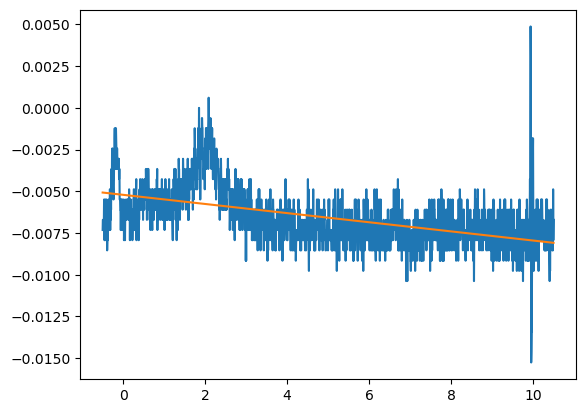

In [477]:
# slope, intercept, r, p, std_err = stats.linregress(x_data, dataframe[3])

# def myfunc(x):
  # return slope * x + intercept

# mymodel = list(map(myfunc, x_data))

# plt.plot(x_data, mymodel)

m, b = np.polyfit(x_data, dataframe[DFI], 1)

plt.plot(x_data, dataframe[DFI])
plt.plot(x_data, m*x_data+b)

print(m*x_data+b)
print(dataframe[DFI])

plt.show()

In [716]:
# residuals = np.zeros(shape=(2220))
residuals = []

for i in range(0, 2199):
    # residuals[i] = [(((dataframe[DFI])[i])-(m*x_data+b))**2]
    residuals.append(((dataframe[DFI])[i])-((m*x_data+b)[i]))
    
# for i in range(0, 2199):
#     print(residuals[i])
    
print(residuals)

threshold = 0.01 
print(type(threshold))
thresArray = []

for i in range(0, 2199):
    if residuals[i] > threshold:
        thresArray.append(residuals[i])

print(thresArray)

for i in range(len(thresArray)):
    print(residuals.index(thresArray[i]))

[-0.0758338357688538, -0.07457205578952476, -0.0727002758219676, -0.07265849581909475, -0.0744467157809062, -0.07318493580157714, -0.0737531557869324, -0.07310137579583142, -0.07732959571055519, -0.07423781576654193, -0.07297603578721287, -0.07232425579611192, -0.07350247576969526, -0.07346069576682242, -0.07219891578749335, -0.0715471357963925, -0.07272535576997574, -0.0739035757435591, -0.07264179576423004, -0.07199001577312909, -0.07377823573494054, -0.07617645615064128, -0.07552467569387902, -0.07304289573809387, -0.07361111572344912, -0.07112933576766396, -0.0716975557530191, -0.07165577575014626, -0.0740539957001858, -0.07218221573262865, -0.07214043572975579, -0.07270865571511105, -0.07327687570046629, -0.07262509570936533, -0.07319331569472058, -0.07132153572716342, -0.07188975571251867, -0.07184797570964581, -0.06997619574208877, -0.071154415715672, -0.07172263570102724, -0.07229085568638251, -0.07224907568350965, -0.073427295657093, -0.07094551570130773, -0.06968373572197879,

[0.01281374 0.01098511]


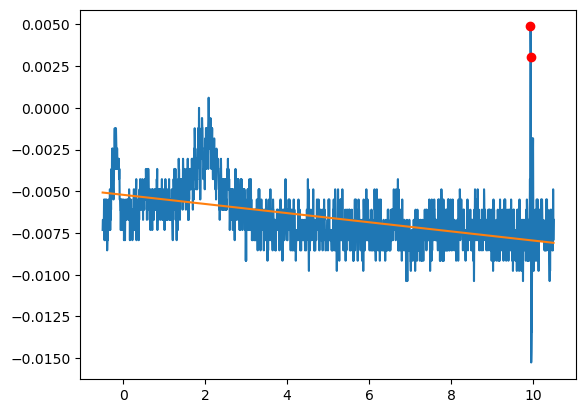

In [548]:
plt.plot(x_data, dataframe[DFI])
plt.plot(x_data, m*x_data+b)

# for i in range(len(thresArray)):
    # plt.plot(residuals.index(thresArray[i])*11/2200 -0.5, (dataframe[DFI])[residuals.index(thesArray[i])], 'ro')

thresArrayToArray = np.array(thresArray)
print(thresArrayToArray)
 
for i in range(0, len(thresArrayToArray)):
    plt.plot((residuals.index(thresArrayToArray[i])*11)/2200 -0.5, (dataframe[DFI])[residuals.index(thresArrayToArray[i])], 'ro')

### ^ Graph showing Data frame, regression line and peak values calculated^

In [480]:
print(thresArrayToArray)

indices = []

for i in thresArrayToArray:
    indices.append(residuals.index(i))
    
print(indices)



[0.01281374 0.01098511]
[2087, 2088]


In [481]:
# function for using evaluating using a threshold length (either n of samples l/r of peak or time (s) length)

# method 1: points n to the left and n to the right of peak are also greater than either the same threshold length or an adapted threshold length

thresLength = 10

for peakIndex in indices:
    leftPoints = []
    rightPoints = []
    for i in range(1, thresLength + 1):
        leftPoints.append(peakIndex - i)
        rightPoints.append(peakIndex + i)
    
    print(leftPoints)
    print(rightPoints)
    
    for i in range(0, len(thresArrayToArray):
        plt.plot((residuals.index(thresArrayToArray[i])*11)/2200 -0.5, (dataframe[DFI])[residuals.index(thresArrayToArray[i])], 'ro')
    

# method 2: integrate between n points to left and right of peak -- above threshold area?

# method 3: prominence jobbie with parameters

# method 4: find_peaks

SyntaxError: invalid syntax (3269326185.py, line 17)

In [482]:
#Definite Integration between limits 
#Smoothing - Half width maximum * height

<class 'int'>
<class 'int'>


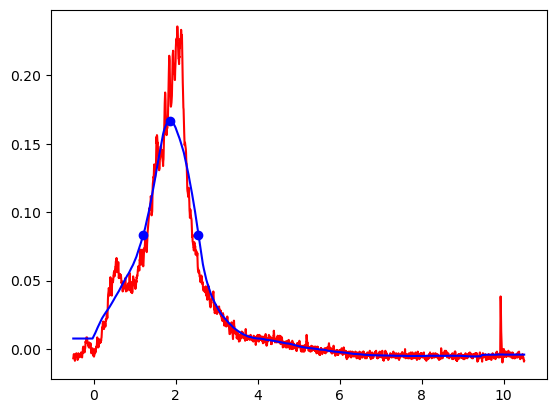

In [718]:
windowLength = 190
polyOrder = 0 # smoothing params

print(type(windowLength))
print(type(polyOrder))

# m, b = np.polyfit(x_data, dataframe[DFI], 1)
# n, c = np.polyfit(x_data, savgol_filter(dataframe[DFI], windowLength, polyOrder), 1)

# graphs
plt.plot(x_data, dataframe[DFI], 'r')
plt.plot(x_data, savgol_filter(dataframe[DFI], windowLength, polyOrder), 'b')

# attributes
threshold = 0.15 # thres height (mEV)
thresWidth = 0 # thres d between two adjacent peaks
thresArray = [] # array of values that sit above the threshold
residuals = [] # residuals (essentially array of y values)

for i in range(0, 2199):
    # residuals[i] = [(((dataframe[DFI])[i])-(m*x_data+b))**2]
    # if (savgol_filter(dataframe[DFI], windowLength, polyOrder)[i])-((m*x_data+b)[i]) > threshold:
        # thresArray.append((savgol_filter(dataframe[DFI], windowLength, polyOrder)[i]))
    residuals.append(((savgol_filter(dataframe[DFI], windowLength, polyOrder))[i])) # add all filtered points to residuals

for i in range(0, 2199):
    if residuals[i] > threshold:
        thresArray.append(residuals[i]) # add all residuals above the threshold height to the thresArray
        
# for i in range(0, len(thresArray)):
    # plt.plot((residuals.index(thresArray[i])*11)/2200 - 0.5, (savgol_filter(dataframe[DFI], windowLength, polyOrder))[residuals.index(thresArray[i])], 'bo')
 
maxpeak = 0 # 

for r in residuals:
    if r > maxpeak:
        maxpeak = r
        
# for i in range(0, peaks):
    # plt.plot(residuals.index(peaks[i] * 11)/2200 - 0.5, (savgol_filter(dataframe[DFI], windowLength, polyOrder))[residuals.index(thresArray[i])], 'bo')

plt.plot((residuals.index(maxpeak) * 11)/2200 - 0.5, (savgol_filter(dataframe[DFI], windowLength, polyOrder))[residuals.index(maxpeak)], 'bo')  
    
# thresArrayToArray = np.array(thresArray)
 
# for i in range(0, len(thresArrayToArray)):
#     plt.plot((residuals.index(thresArrayToArray[i])*11)/2200 -0.5, (dataframe[DFI])[residuals.index(thresArrayToArray[i])], 'ro')

halfindices = []

# for i in savgol_filter(dataframe[DFI], windowLength, polyOrder):
#     if ((dataframe[DFI])[residuals.index(maxpeak)]/ 2) == i:
#         halfindices.append(i)
        
# idx1 = ((np.abs(savgol_filter(dataframe[DFI], windowLength, polyOrder) - (savgol_filter(dataframe[DFI], windowLength, polyOrder)[residuals.index(maxpeak)])/ 2)).argmin())
sortedNearest = sorted(savgol_filter(dataframe[DFI], windowLength, polyOrder), key=lambda i: abs(i - (savgol_filter(dataframe[DFI], windowLength, polyOrder)[residuals.index(maxpeak)])/ 2))[:3]

                           
# (np.abs(arr_y - HM)).argmin()

# print(savgol_filter(dataframe[DFI], windowLength, polyOrder))
# print(halfindices)

plt.plot((residuals.index(sortedNearest[0]) * 11)/2200 - 0.5, (savgol_filter(dataframe[DFI], windowLength, polyOrder))[residuals.index(sortedNearest[0])], 'bo')
plt.plot((residuals.index(sortedNearest[1]) * 11)/2200 - 0.5, (savgol_filter(dataframe[DFI], windowLength, polyOrder))[residuals.index(sortedNearest[1])], 'bo')

In [719]:
time1 = ((residuals.index(sortedNearest[0]) * 11)/2200 - 0.5)
time2 = ((residuals.index(sortedNearest[1]) * 11)/2200 - 0.5)
(maxpeak)

print(time1) 
print(time2)

area = (time2 - time1) * maxpeak

print(f"{area} Micro Electro Volt MilliSeconds")

1.205
2.555
0.2250925340758344 Micro Electro Volt MilliSeconds
<class 'numpy.ndarray'>


In [ ]:
# ask user (sliders in gui) to define thresheight(minimum displacement from baseline), threslength(minimum distance between two adjacent peaks), windowlength, polyorder, n number of largest peaks, create defaults for these parameters
# do the shiz
# - get data (mqtt or dummy)
# return quantified values for each n peak, which blm, when (start, end)

In [ ]:
# 1. be able to calculate multiple peaks (w/ threshold distance between two adjacent peaks)
# 2. turn into functions
# 3. testing
# 4. (if time) same thing use integration (cmp)

### Notes:

#### - Our peak finding algorithm currently only expects one peak per signal (Consolidation for multiple peaks in a signal is not yet implemented)
#### - It requires the signal to be offset to a baseline of zero (the quantified signal values returned are inaccurate if this is not the case)
#### - The params are the dataFrame (datatype <class 'numpy.ndarray'>), thresHeight (datatype <class 'float'>), windLength (datatype <class 'int'>), polyOrder (datatype <class 'int'>) 
#### - (thresAdjLength is a param for defining the minimum distance between two peaks for the program to detect two distinct different peaks) (As previously said, we've not yet implemented the program with consolidation of multiple peaks in a single BLM signal)
#### - The quantified value returned for each peak is based off of the height of the (SMOOTHENED) peak multiplied by the length between the two (SMOOTHENED) full half width maximum x_values
#### - The program will return prints of each BLM, with the original signal, smoothened signal, detected peaks and full width half maximums marked. 
#### - The program will also return the values of each peak and the BLM it belongs to
#### - The program is yet to be tested for sufficient application at 1hz, hence, the algorithm is yet to be optimised for time complexity.
#### - The program assumes that there are 2200 samples taken in each BLM, from times -0.5 to 10.5. Changing these values is just a case of changing the values used to declare the global x_data variable.
#### - The local variables for each subroutine are:
#### - - 

No peaks found at BLM 0 for thresHeight 0
Peak of value 0.0008336760521327207 found between time points 0.405 and 0.41000000000000003 in BLM 1
Peak of value -0.0008336760521327022 found between time points 2.795 and 2.79 in BLM 2
No peaks found at BLM 3 for thresHeight 0
No peaks found at BLM 4 for thresHeight 0
Peak of value 0.2250925340758344 found between time points 1.205 and 2.555 in BLM 5
Peak of value 0.21925680171090534 found between time points 1.29 and 2.605 in BLM 6
Peak of value -0.18841078778199472 found between time points 2.535 and 1.405 in BLM 7
Peak of value -0.0633593799620867 found between time points 2.225 and 1.8450000000000002 in BLM 8
Peak of value -1.1621444166730115 found between time points 9.79 and 2.82 in BLM 9
No peaks found at BLM 10 for thresHeight 0
No peaks found at BLM 11 for thresHeight 0
No peaks found at BLM 12 for thresHeight 0
Peak of value -0.005002056312796324 found between time points 0.6000000000000001 and 0.5700000000000001 in BLM 13
Peak of 

C:\Users\yrr88966\AppData\Local\Temp\ipykernel_20488\3513021434.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,20))


Peak of value -0.01917454919905252 found between time points 2.13 and 2.015 in BLM 34
No peaks found at BLM 35 for thresHeight 0
Peak of value -0.0008336760521327207 found between time points 0.03500000000000003 and 0.030000000000000027 in BLM 36
Peak of value 0.0008336760521327022 found between time points 1.34 and 1.345 in BLM 37
Peak of value -0.0666940841706176 found between time points 0.885 and 0.485 in BLM 38
No peaks found at BLM 39 for thresHeight 0


IndexError: index 40 is out of bounds for axis 0 with size 40

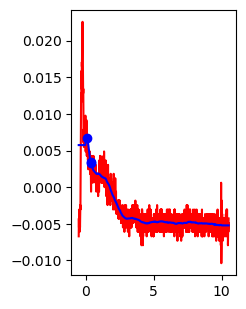

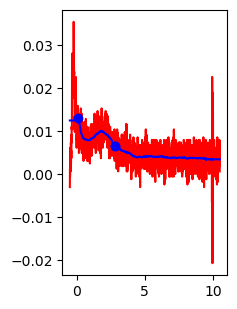

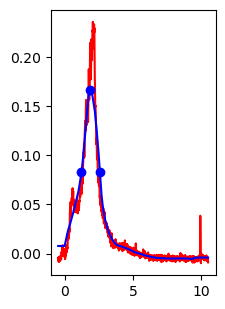

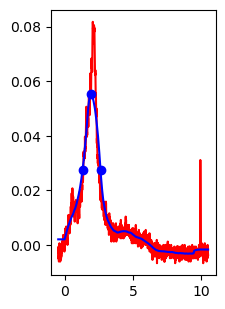

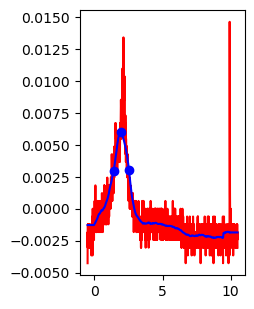

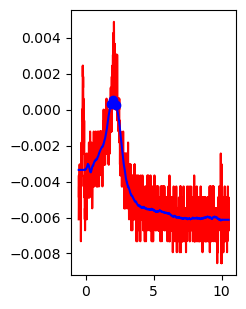

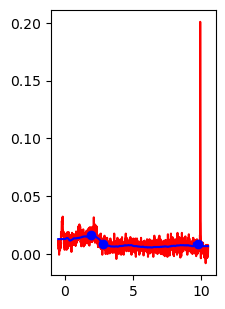

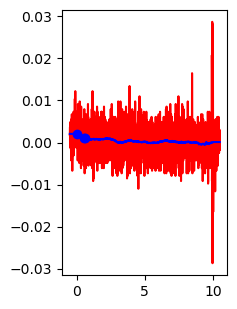

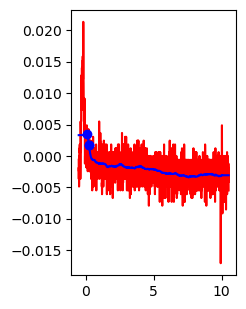

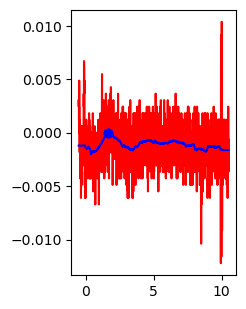

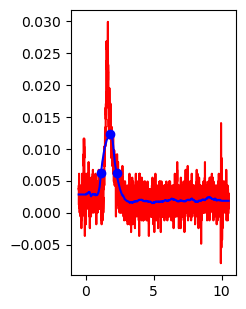

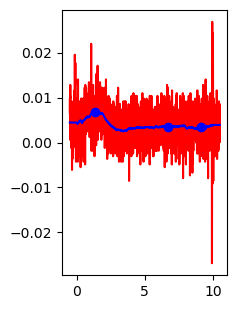

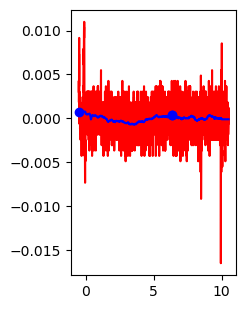

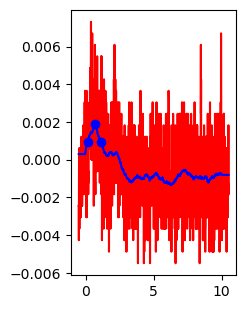

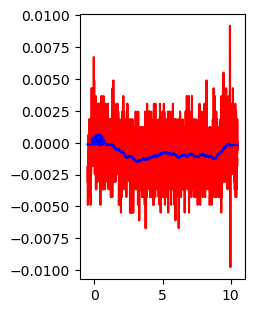

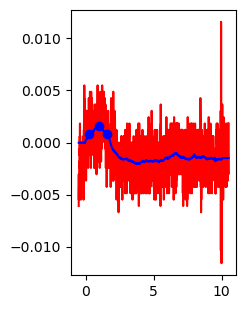

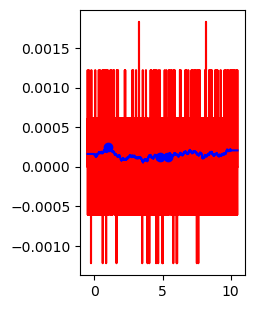

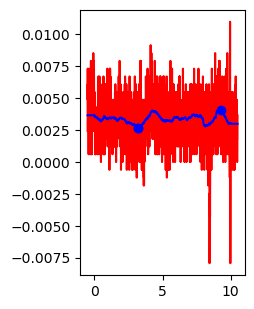

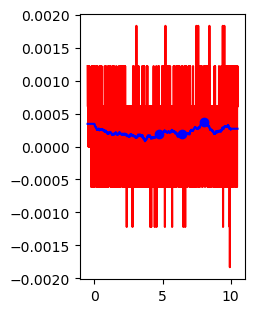

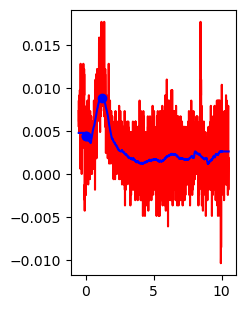

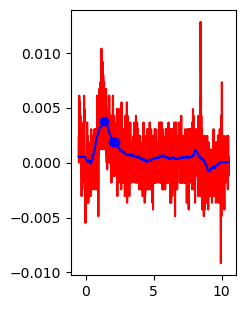

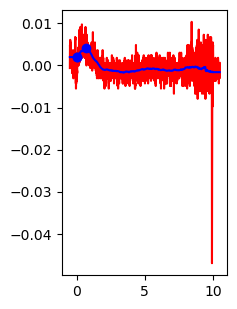

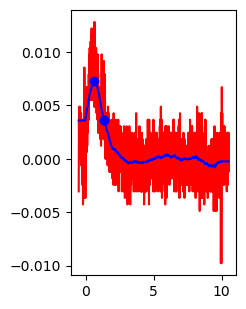

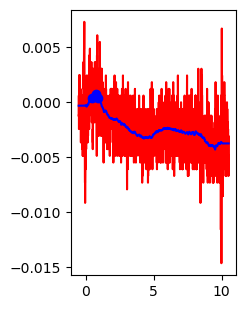

In [758]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

x_data = x_data = np.linspace(-0.5, 10.5, 2200) # declaration of x values, (start, end, step)

files = glob.glob("BLM_R5IM_Data/cycle" + '/*.csv')

selected_file = files[0]

input_data = pd.read_csv(selected_file)
dataframe = input_data.drop(columns = input_data.columns[0]).to_numpy()

def findOnePeak(dataFrame, thresHeight, windLength, polyOrder): # Peak Finding Algorithm, user defined params
    g = 0
    for DFI in range(0, dataFrame.size - 1):
        maxPeak = 0
        residuals = [] # array of each residual height from 0 (distance from discrete smoothened yvalue of each sample to 0)
        heightsAboveThreshold = [] # array of values of all discrete smoothened yvalues above threshold height
        halfIndices = [] # array of values with discrete smoothened yvalue exactly (or nearest to) 1/2 of yvalue of peak
        sortedNearest = [] # halfIndices array sorted from smoothened yvalues nearest to 1/2 of yvalue of smoothened peak
        time1 = 0
        time2 = 0
        area = 0
        
        for i in range(0, 2199):
            residuals.append(((savgol_filter(dataframe[DFI], windLength, polyOrder))[i]))
            if residuals[i] > thresHeight:
                heightsAboveThreshold.append(residuals[i]) 
                
        heightsAboveThreshold = np.array(heightsAboveThreshold)
                
        if heightsAboveThreshold.size != 0:
            for r in residuals:
                 if r > maxPeak:
                     maxPeak = r
        
            sortedNearest = sorted(savgol_filter(dataframe[DFI], windLength, polyOrder), key=lambda i: abs(i - (savgol_filter(dataframe[DFI], windLength, polyOrder)[residuals.index(maxPeak)])/ 2))[:3]
            plt.figure(figsize=(20,20))
            g += 1
            plt.subplot(5, 8, g)
            plt.plot(x_data, dataframe[DFI], 'r')
            plt.plot(x_data, savgol_filter(dataframe[DFI], windowLength, polyOrder), 'b')
            plt.plot((residuals.index(maxPeak) * 11)/2200 - 0.5, (savgol_filter(dataframe[DFI], windowLength, polyOrder))[residuals.index(maxPeak)], 'bo')  
            plt.plot((residuals.index(sortedNearest[0]) * 11)/2200 - 0.5, (savgol_filter(dataframe[DFI], windowLength, polyOrder))[residuals.index(sortedNearest[0])], 'bo')
            plt.plot((residuals.index(sortedNearest[1]) * 11)/2200 - 0.5, (savgol_filter(dataframe[DFI], windowLength, polyOrder))[residuals.index(sortedNearest[1])], 'bo')
            
            time1 = ((residuals.index(sortedNearest[0]) * 11)/2200 - 0.5)
            time2 = ((residuals.index(sortedNearest[1]) * 11)/2200 - 0.5)
            
            area = (time2 - time1) * maxpeak
            
            print(f"Peak of value {area} found between time points {time1} and {time2} in BLM {DFI}")
        else:  
            print(f"No peaks found at BLM {DFI} for thresHeight {thresHeight}") 
        
findOnePeak(dataframe, 0, 190, 0)

# def findMultiplePeaks(dataFrame, thresHeight, thresAdjLength, windLength, polyOrder): # NOT COMPLETE

# def findOnePeakDefaultParams(): # Peak Finding Algorithm, default Params (need to find appropriate default params)
    
# def findMultiplePeaksDefaultParams() : # NOT COMPLETE